Data loaded successfully. Here are the first 5 rows:
                 AGG  Infrastructure     SP500      Gold
Date                                                    
2006-09-30  0.001699        0.000000  0.024269 -0.045479
2006-10-31  0.006768        0.000000  0.031022  0.014978
2006-11-30 -0.015997        0.000000  0.016332  0.067384
2006-12-31  0.002718        0.124604  0.012537 -0.020436
2007-01-31  0.009503        0.000000  0.013961  0.028388




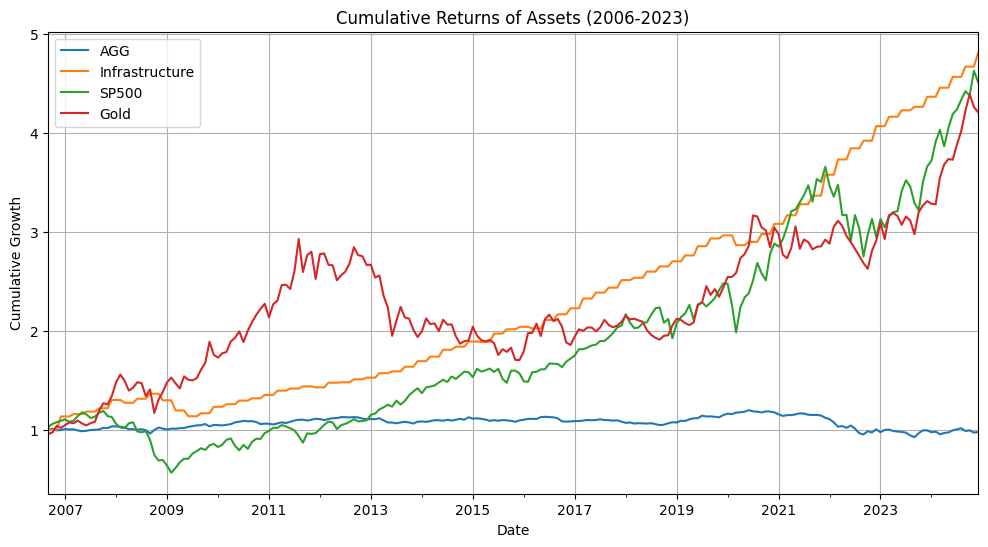

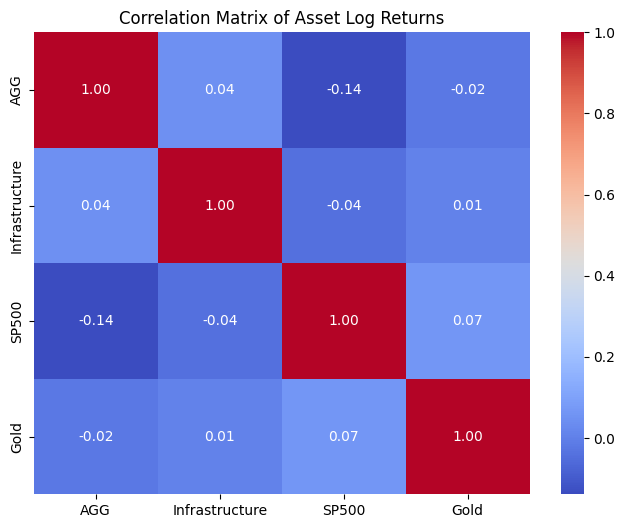

EDA plots have been generated.


--- Metrics for Equal-Weight Portfolio ---
Sortino Ratio: 1.0040
Calmar Ratio: 0.3944
CVaR (95%): -0.0351 (Note: This is a monthly value)


In [2]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add the 'src' directory to the Python path
src_path = os.path.join(project_root, 'src')
if src_path not in sys.path:
    sys.path.append(src_path)
import metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1.1. Loading and Cleaning the Data ---

# Load the dataset
# Make sure the path is correct relative to your notebook location
file_path = '../data/220 obs 4 asset.csv' 
df = pd.read_csv(file_path, parse_dates=['Date'], dayfirst=True, index_col='Date')

# Rename columns for easier access
df.columns = ['AGG', 'Infrastructure', 'SP500', 'Gold']

print("Data loaded successfully. Here are the first 5 rows:")
print(df.head())
print("\n" + "="*50 + "\n")

# --- 1.2. Exploratory Data Analysis (EDA) ---

cumulative_returns = np.exp(df.cumsum())
plt.figure(figsize=(12, 6))
cumulative_returns.plot(ax=plt.gca())
plt.title('Cumulative Returns of Assets (2006-2023)')
plt.ylabel('Cumulative Growth')
plt.grid(True)
plt.show()

correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Asset Log Returns')
plt.show()

print("EDA plots have been generated.")
print("\n" + "="*50 + "\n")

# --- Testing with an Equal-Weight Portfolio ---
portfolio_returns = df.mean(axis=1)

print(f"--- Metrics for Equal-Weight Portfolio ---")
# Note: We now call the functions using 'metrics.' as a prefix
print(f"Sortino Ratio: {metrics.sortino_ratio(portfolio_returns):.4f}")
print(f"Calmar Ratio: {metrics.calmar_ratio(portfolio_returns):.4f}")
print(f"CVaR (95%): {metrics.cvar(portfolio_returns):.4f} (Note: This is a monthly value)")

In [12]:
# Equal weights
n_assets = df.shape[1]
weights = np.ones(n_assets) / n_assets

# Portfolio returns
portfolio_returns = df.dot(weights)

print(portfolio_returns.head())


Date
2006-09-30   -0.004878
2006-10-31    0.013192
2006-11-30    0.016930
2006-12-31    0.029856
2007-01-31    0.012963
dtype: float64


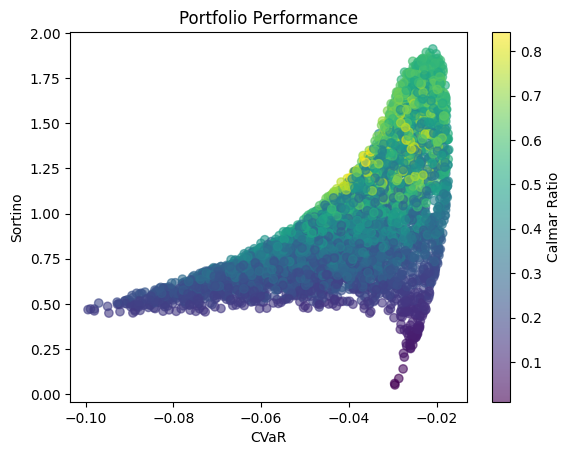

Best portfolio found:
weights    [0.17915992818598, 0.8122667338395345, 0.00835...
sortino                                             1.911253
calmar                                              0.511688
cvar                                               -0.020863
Name: 3989, dtype: object


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from metrics import sortino_ratio, calmar_ratio, cvar

returns = df  

# 1. generate random portfolio weights
n_portfolios = 5000
n_assets = returns.shape[1]

weights = np.random.dirichlet(np.ones(n_assets), size=n_portfolios)

# 2. evaluate each portfolio
results = []
for w in weights:
    port_ret = returns.values @ w  # portfolio returns
    results.append({
        "weights": w,
        "sortino": sortino_ratio(port_ret),
        "calmar": calmar_ratio(port_ret),
        "cvar": cvar(port_ret)
    })

results_df = pd.DataFrame(results)

# 3. quick visualization
plt.scatter(results_df["cvar"], results_df["sortino"], 
            c=results_df["calmar"], cmap="viridis", alpha=0.6)
plt.xlabel("CVaR")
plt.ylabel("Sortino")
plt.title("Portfolio Performance")
plt.colorbar(label="Calmar Ratio")
plt.show()

# 4. best candidate portfolio
best_portfolio = results_df.sort_values(
    by=["sortino", "calmar", "cvar"], 
    ascending=[False, False, True]
).iloc[0]

print("Best portfolio found:")
print(best_portfolio)

